# Total Factor of Productivity (TFP)

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import wrds
db = wrds.Connection()

Enter your WRDS username [shinggg]:shinggg
Enter your password:········
WRDS recommends setting up a .pgpass file.
You can find more info here:
https://www.postgresql.org/docs/9.5/static/libpq-pgpass.html.
Loading library list...
Done


In [86]:
dt = pd.read_csv('../data/TFPData_updated_ImrohorogluTuzel.csv')

In [38]:
comp = db.raw_sql("""
                    select gvkey, tic, conm, datadate, fyear, sich, prcc_f, csho,
                    at, aqc, ppegt, ppent, emp, capx, capxv, sale, cogs, xad, xrd, xsga,
                    pstkl, txditc,
                    pstkrv, seq, pstk, mkvalt
                    from comp.funda
                    where 
                    (sale > 0 or at > 0)
                    and indfmt='INDL'
                    and datafmt='STD'
                    and popsrc='D'
                    and consol='C'
                    and curcd='USD'
                    and datadate >= '1963-01-01'
                    and fic='USA'
                    and final='Y'
                    """)

In [4]:
dt.shape

(136523, 3)

In [104]:
comp.shape

(354814, 29)

In [5]:
dt.head()

,gvkey,fyear,TFP
0,1000,1970,-0.142948
1,1000,1971,-0.447827
2,1000,1972,-0.270695
3,1000,1973,-0.242724
4,1000,1974,-0.296757


In [9]:
dt.TFP.describe()

count    136523.000000
mean         -0.323590
std           0.438831
min          -5.530810
25%          -0.507897
50%          -0.304374
75%          -0.111074
max           3.360018
Name: TFP, dtype: float64

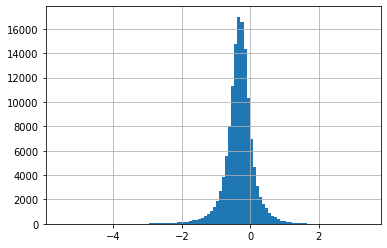

In [16]:
dt.TFP.hist(bins=100)

In [26]:
dt_TFP_frontier_yearly = dt.groupby('fyear')[['TFP']].max()
dt_TFP_mean_yearly = dt.groupby('fyear')[['TFP']].mean()
dt_TFP_median_yearly = dt.groupby('fyear')[['TFP']].median()

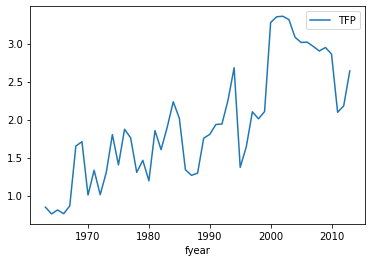

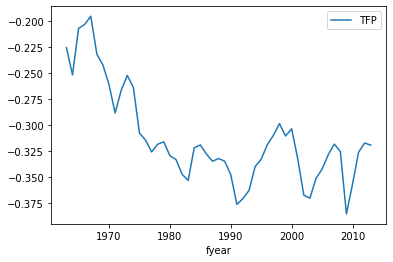

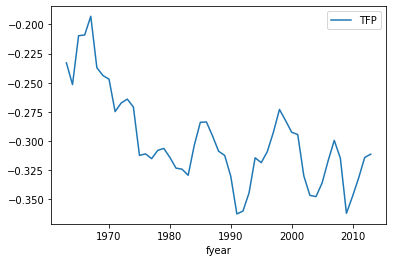

In [28]:
dt_TFP_frontier_yearly.plot()
dt_TFP_mean_yearly.plot()
dt_TFP_median_yearly.plot()

In [39]:
# create preferrerd stock
comp['ps']=np.where(comp['pstkrv'].isnull(), comp['pstkl'], comp['pstkrv'])
comp['ps']=np.where(comp['ps'].isnull(),comp['pstk'], comp['ps'])
comp['ps']=np.where(comp['ps'].isnull(),0,comp['ps'])

comp['txditc']=comp['txditc'].fillna(0)

# create book equity
comp['be']=comp['seq']+comp['txditc']-comp['ps']
comp['be']=np.where(comp['be']>0, comp['be'], np.nan)

In [40]:
# create market value
comp['me']=comp['prcc_f']*comp['csho']

In [102]:
# compare me and mkvalt
comp[comp.tic=='MSFT'][['fyear','mkvalt','me','sich']]

,fyear,mkvalt,me,sich
188925,1985.0,NaN,NaN,NaN
188926,1986.0,NaN,7.847394e+02,NaN
188927,1987.0,NaN,2.688411e+03,7372.0
188928,1988.0,NaN,3.595418e+03,7372.0
188929,1989.0,NaN,2.893054e+03,7372.0
188930,1990.0,NaN,8.641114e+03,7372.0
188931,1991.0,NaN,1.186969e+04,7372.0
188932,1992.0,NaN,1.904973e+04,7372.0
188933,1993.0,NaN,2.481600e+04,7372.0
188934,1994.0,NaN,2.999412e+04,7372.0


In [94]:
comp['gvkey']=comp.gvkey.astype('int')

In [356]:
df=pd.merge(dt,comp, on=['gvkey','fyear'])

In [357]:
df.head()

,gvkey,fyear,TFP,tic,conm,datadate,sich,prcc_f,csho,at,...,xsga,pstkl,txditc,pstkrv,seq,pstk,mkvalt,ps,be,me
0,1000,1970,-0.142948,AE.2,A & E PLASTIK PAK INC,1970-12-31,NaN,10.000,2.446,33.450,...,9.420,0.000,0.000,0.000,10.544,0.000,NaN,0.000,10.544,24.46000
1,1000,1971,-0.447827,AE.2,A & E PLASTIK PAK INC,1971-12-31,NaN,5.750,2.995,29.330,...,10.548,0.000,0.000,0.000,8.382,0.000,NaN,0.000,8.382,17.22125
2,1000,1972,-0.270695,AE.2,A & E PLASTIK PAK INC,1972-12-31,NaN,5.125,2.902,19.907,...,7.551,0.000,0.288,0.000,7.021,0.000,NaN,0.000,7.309,14.87275
3,1000,1973,-0.242724,AE.2,A & E PLASTIK PAK INC,1973-12-31,NaN,1.750,2.840,21.771,...,8.532,0.000,0.231,0.000,8.567,0.000,NaN,0.000,8.798,4.97000
4,1000,1974,-0.296757,AE.2,A & E PLASTIK PAK INC,1974-12-31,NaN,2.125,2.150,25.638,...,8.859,0.414,0.091,2.069,10.257,0.414,NaN,2.069,8.279,4.56875


In [358]:
df=df[df['sich'].notna()]

In [359]:
df.shape

(75229, 30)

In [360]:
df= df[~((df.sich >= 4900) & (df.sich < 5000))]
df= df[~((df.sich >= 6000) & (df.sich < 7000))]

In [361]:
df.shape

(74896, 30)

In [362]:
df=df[(df.aqc <= (0.05 * df['at']))]

In [363]:
df.shape

(62117, 30)

In [364]:
df.groupby(['fyear', 'sich'])[['TFP']].max()

TFP
fyear sich            
1984  3661.0 -0.234663
1985  3661.0 -0.273479
1986  3661.0 -0.276334
1987  100.0  -1.012725
      1040.0  0.549777
...                ...
2013  8731.0  0.313157
      8734.0 -0.187932
      8741.0 -0.305392
      8742.0  0.003263
      9997.0  0.372422

[8094 rows x 1 columns]

In [365]:
df.loc[df.index,'TFP_frontier_fyear_sich'] = df.groupby(['fyear', 'sich'])['TFP'].transform(max)
df.loc[df.index,'TFP_mean_fyear_sich'] = df.groupby(['fyear', 'sich'])['TFP'].transform(np.mean)
df.loc[df.index,'TFP_median_fyear_sich'] = df.groupby(['fyear', 'sich'])['TFP'].transform(np.median)

In [366]:
df.loc[df.index,'gap'] = df['TFP_frontier_fyear_sich'] - df['TFP']

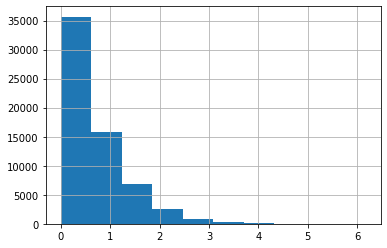

In [367]:
df.gap.hist()

In [368]:
df=df[df['be'].notna()]
df=df[df['me'].notna()]

df=df[df['be']>0]
df=df[df['me']>0]

In [369]:
df.shape

(54691, 34)

In [370]:
df['beme'] = df['be']/df['me']

In [371]:
df['beme'].describe()

count     54691.000000
mean          6.346672
std         747.583863
min           0.000141
25%           0.340502
50%           0.583724
75%           0.958056
max      159169.086392
Name: beme, dtype: float64

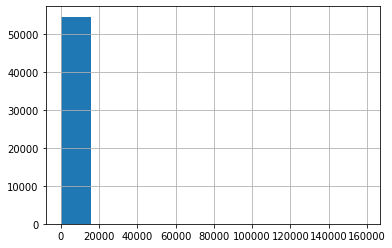

In [372]:
df['beme'].hist()

In [373]:
df[['gap', 'beme']].corr()

,gap,beme
gap,1.000000,-0.001605
beme,-0.001605,1.000000


In [374]:
from scipy.stats.mstats import winsorize

In [375]:
df['beme'].describe()

count     54691.000000
mean          6.346672
std         747.583863
min           0.000141
25%           0.340502
50%           0.583724
75%           0.958056
max      159169.086392
Name: beme, dtype: float64

In [376]:
lr = df['beme'].describe(percentiles=[0.005])['0.5%']

In [377]:
up = df['beme'].describe(percentiles=[0.995])['99.5%']

In [378]:
df.beme = df.beme.clip(lr, up)

In [379]:
#df = df[(df['beme'] >= df['beme'].describe(percentiles=[0.005])['0.5%']) & (df['beme'] <= df['beme'].describe(percentiles=[0.995])['99.5%'])]

In [380]:
df.shape

(54691, 35)

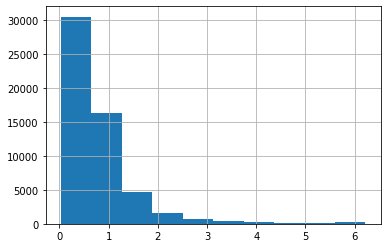

In [381]:
df.beme.hist()

In [382]:
df[['gap', 'beme']].corr()

,gap,beme
gap,1.000000,0.055633
beme,0.055633,1.000000


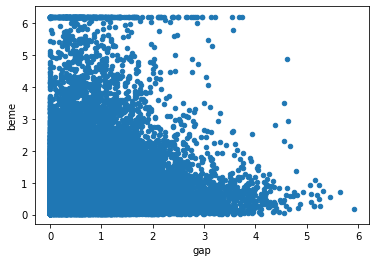

In [383]:
df.plot.scatter(x='gap', y='beme')

# Panel Regressions

In [384]:
from linearmodels import PanelOLS

In [385]:
df=df.set_index(['gvkey','fyear'])

In [393]:
df['size'] = np.log(df['at'])

In [394]:
mod = PanelOLS.from_formula('beme ~ 1 + gap + size + EntityEffects + TimeEffects', data=df)
res = mod.fit(cov_type='kernel')
print(res)

                          PanelOLS Estimation Summary                           
Dep. Variable:                   beme   R-squared:                        0.0190
Estimator:                   PanelOLS   R-squared (Between):             -0.0880
No. Observations:               54691   R-squared (Within):               0.0218
Date:                Tue, Dec 08 2020   R-squared (Overall):             -0.0493
Time:                        23:30:18   Log-likelihood                 -4.15e+04
Cov. Estimator:        Driscoll-Kraay                                           
                                        F-statistic:                      453.27
Entities:                        7896   P-value                           0.0000
Avg Obs:                       6.9264   Distribution:                 F(2,46764)
Min Obs:                       1.0000                                           
Max Obs:                       27.000   F-statistic (robust):             143.54
                            

In [400]:
mod = PanelOLS.from_formula('beme ~ 1 + gap + size + ppent+ emp+ capx+ sale+ cogs+ xrd+ xsga+ EntityEffects + TimeEffects', data=df)
res = mod.fit(cov_type='kernel')
print(res)

                          PanelOLS Estimation Summary                           
Dep. Variable:                   beme   R-squared:                        0.0216
Estimator:                   PanelOLS   R-squared (Between):             -0.0900
No. Observations:               32539   R-squared (Within):               0.0205
Date:                Tue, Dec 08 2020   R-squared (Overall):             -0.0540
Time:                        23:32:39   Log-likelihood                -2.145e+04
Cov. Estimator:        Driscoll-Kraay                                           
                                        F-statistic:                      67.994
Entities:                        4844   P-value                           0.0000
Avg Obs:                       6.7174   Distribution:                 F(9,27657)
Min Obs:                       1.0000                                           
Max Obs:                       27.000   F-statistic (robust):             38.533
                            

In [405]:
mod = PanelOLS.from_formula('beme ~ 1 + TFP + size + ppent + np.sqrt(emp) + np.log(capx)+ np.log(sale)+ EntityEffects + TimeEffects', data=df)
res = mod.fit(cov_type='kernel')
print(res)

                          PanelOLS Estimation Summary                           
Dep. Variable:                   beme   R-squared:                        0.0571
Estimator:                   PanelOLS   R-squared (Between):             -0.0357
No. Observations:               54691   R-squared (Within):               0.0524
Date:                Tue, Dec 08 2020   R-squared (Overall):              0.0117
Time:                        23:33:51   Log-likelihood                -4.041e+04
Cov. Estimator:        Driscoll-Kraay                                           
                                        F-statistic:                      472.32
Entities:                        7896   P-value                           0.0000
Avg Obs:                       6.9264   Distribution:                 F(6,46760)
Min Obs:                       1.0000                                           
Max Obs:                       27.000   F-statistic (robust):             98.222
                            

# Sort Portfolios

In [320]:
df.head()

TFP   tic                   conm    datadate    sich  \
gvkey fyear                                                              
1003  1987  -0.431385  ANTQ  A.A. IMPORTING CO INC  1988-01-31  5712.0   
1004  1987  -0.094028   AIR               AAR CORP  1988-05-31  5080.0   
      1988   0.093879   AIR               AAR CORP  1989-05-31  5080.0   
      1989  -0.176446   AIR               AAR CORP  1990-05-31  5080.0   
      1990  -0.032535   AIR               AAR CORP  1991-05-31  5080.0   

                prcc_f    csho       at    aqc    ppegt  ...  pstk  mkvalt  \
gvkey fyear                                              ...                 
1003  1987    2.750000   2.683   16.042  0.000    2.297  ...   0.0     NaN   
1004  1987   25.124977  15.870  284.948  2.749   76.251  ...   0.0     NaN   
      1988   31.249992  16.009  356.391  2.397   85.414  ...   0.0     NaN   
      1989   21.249998  16.082  388.521  0.000  105.646  ...   0.0     NaN   
      1990   14.124999  15.891  379.958  0.000  113.060  ...   0.0     NaN   

              ps       be          me  TFP_frontier_fyear_sich  \
gvkey fyear                                                      
1003  1987   0.0    7.643    7.378250                -0.055870   
1004  1987   0.0  158.497  398.733387                -0.094028   
      1988   0.0  202.580  500.281128                 0.093879   
      1989   0.0  225.548  341.742462                 0.225044   
      1990   0.0  231.778  224.460360                 0.428965   

             TFP_mean_fyear_sich  TFP_median_fyear_sich       gap      beme  
gvkey fyear                                                                  
1003  1987             -0.402403              -0.299200  0.375515  1.035882  
1004  1987             -0.387616              -0.395167  0.000000  0.397501  
      1988             -0.647322              -0.564653  0.000000  0.404932  
      1989             -0.359115              -0.420692  0.401490  0.659994  
      1990             -0.504218              -0.142946  0.461501  1.032601  

[5 rows x 33 columns]

In [322]:
df.gap.describe()

count    54691.000000
mean         0.681567
std          0.666575
min          0.000000
25%          0.188584
50%          0.505944
75%          0.988610
max          5.917861
Name: gap, dtype: float64

## Overall sort

In [345]:
dec_dict=df.gap.quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]).to_dict()

In [355]:
dec_dict

{0.0: 0.0,
 0.1: 0.0,
 0.2: 0.1182927,
 0.3: 0.2507585,
 0.4: 0.3726301999999999,
 0.5: 0.5059440000000001,
 0.6: 0.6644545000000001,
 0.7: 0.8632778000000001,
 0.8: 1.1364332,
 0.9: 1.584652,
 1.0: 5.917861}

In [447]:
df.loc[(df.gap >=dec_dict[0.0]) & (df.gap <= dec_dict[0.1]),['gap','TFP','beme']].mean()

gap     0.000000
TFP     0.020626
beme    0.581108
dtype: float64

In [415]:
df.loc[(df.gap > dec_dict[0.1]) & (df.gap <= dec_dict[0.2]),['gap','TFP','beme']].mean()

gap     0.064305
TFP    -0.136588
beme    0.630245
dtype: float64

In [416]:
df.loc[(df.gap > dec_dict[0.2]) & (df.gap <= dec_dict[0.3]),['gap','TFP','beme']].mean()

gap     0.187150
TFP    -0.205804
beme    0.696792
dtype: float64

In [422]:
df.loc[(df.gap > dec_dict[0.3]) & (df.gap <= dec_dict[0.4]),['gap','TFP','beme']].mean()

gap     0.311075
TFP    -0.269103
beme    0.836170
dtype: float64

In [418]:
df.loc[(df.gap > dec_dict[0.4]) & (df.gap <= dec_dict[0.5]),['gap','TFP','beme']].mean()

gap     0.438368
TFP    -0.313056
beme    0.867048
dtype: float64

In [423]:
df.loc[(df.gap > dec_dict[0.5]) & (df.gap <= dec_dict[0.6]),['gap','TFP','beme']].mean()

gap     0.582330
TFP    -0.357824
beme    0.888244
dtype: float64

In [434]:
list(dec_dict.keys())[1::]

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [480]:
var_list=['gap','TFP','beme']
overall_sort_dict={}
overall_sort_gap=[]
overall_sort_TFP=[]
overall_sort_beme=[]
#for decile in list(dec_dict.keys())[1::]:
for i in range(0,10):
    decile = list(dec_dict.keys())[1::][i]
    if i == 0:
        print('decile = 0.1')
        overall_sort_gap.append(df.loc[(df.gap >=dec_dict[0]) & (df.gap <= dec_dict[decile]),var_list].mean()['gap'])
        overall_sort_TFP.append(df.loc[(df.gap >=dec_dict[0]) & (df.gap <= dec_dict[decile]),var_list].mean()['TFP'])
        overall_sort_beme.append(df.loc[(df.gap >=dec_dict[0]) & (df.gap <= dec_dict[decile]),var_list].mean()['beme'])
    else:
        print(decile)
        decile0 = list(dec_dict.keys())[1::][i-1]
        overall_sort_gap.append(df.loc[(df.gap >dec_dict[decile0]) & (df.gap <= dec_dict[decile]),var_list].mean()['gap'])
        overall_sort_TFP.append(df.loc[(df.gap >dec_dict[decile0]) & (df.gap <= dec_dict[decile]),var_list].mean()['TFP'])
        overall_sort_beme.append(df.loc[(df.gap >dec_dict[decile0]) & (df.gap <= dec_dict[decile]),var_list].mean()['beme'])
        
overall_sort_dict['gap']=overall_sort_gap
overall_sort_dict['TFP']=overall_sort_TFP
overall_sort_dict['beme']=overall_sort_beme

decile = 0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9
1.0


In [481]:
overall_sort_dict

{'gap': [0.0,
  0.06430467525423711,
  0.18714964623148606,
  0.31107459139147986,
  0.4383676699396612,
  0.582329633355276,
  0.7592977789175349,
  0.9912924955238628,
  1.337749443755711,
  2.164824333940383],
 'TFP': [0.020626212769315994,
  -0.13658766572504724,
  -0.20580406547815,
  -0.2691028843115742,
  -0.3130555010056686,
  -0.3578238882793926,
  -0.40174758431157326,
  -0.46954084328030565,
  -0.5603772616200426,
  -1.0370279127994173],
 'beme': [0.5811076195068833,
  0.6302446724218741,
  0.6967919284594676,
  0.8361699863833009,
  0.867047928380739,
  0.8882435087907358,
  0.9027694427249188,
  0.8757490802173975,
  0.8292644312960082,
  0.7735128781421922]}

In [482]:
pd.DataFrame(overall_sort_dict)

,gap,TFP,beme
0,0.000000,0.020626,0.581108
1,0.064305,-0.136588,0.630245
2,0.187150,-0.205804,0.696792
3,0.311075,-0.269103,0.836170
4,0.438368,-0.313056,0.867048
5,0.582330,-0.357824,0.888244
6,0.759298,-0.401748,0.902769
7,0.991292,-0.469541,0.875749
8,1.337749,-0.560377,0.829264
9,2.164824,-1.037028,0.773513
